In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import joblib
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [36]:
car_price_dataset = pd.read_csv("car_price_dataset.csv")

In [37]:
car_price_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Honda City,2011,8.25,28.29,108694,CNG,Individual,Manual,0
1,Toyota Fortuner,2015,9.53,17.16,131324,CNG,Individual,Manual,1
2,Maruti Baleno,2010,0.78,2.03,108355,Petrol,Dealer,Automatic,1
3,Toyota Fortuner,2021,10.25,19.32,89478,Diesel,Individual,Automatic,3
4,Honda City,2019,8.06,22.41,72435,CNG,Individual,Automatic,0


In [38]:
car_price_dataset.shape

(2000, 9)

In [39]:
car_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       2000 non-null   object 
 1   Year           2000 non-null   int64  
 2   Selling_Price  2000 non-null   float64
 3   Present_Price  2000 non-null   float64
 4   Kms_Driven     2000 non-null   int64  
 5   Fuel_Type      2000 non-null   object 
 6   Seller_Type    2000 non-null   object 
 7   Transmission   2000 non-null   object 
 8   Owner          2000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 140.8+ KB


In [40]:
car_price_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [41]:
car_price_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2014.083000,8.508385,18.695280,126635.962000,1.438500
std,5.476779,5.299577,9.548905,70915.498876,1.129095
min,2005.000000,0.500000,2.010000,5026.000000,0.000000
25%,2009.000000,4.317500,10.110000,68749.000000,0.000000
50%,2014.000000,7.615000,18.845000,123659.500000,1.000000
75%,2019.000000,11.822500,27.045000,186529.000000,2.000000
max,2023.000000,26.990000,34.980000,249896.000000,3.000000


In [42]:
print("\n Fuel Type")
print(car_price_dataset["Fuel_Type"].value_counts())
print("\n Seller Type:")
print(car_price_dataset["Seller_Type"].value_counts())
print("\n Transmisson type:")
print(car_price_dataset["Transmission"].value_counts())
print("\n Owner type")
print(car_price_dataset["Owner"].value_counts())


 Fuel Type
Fuel_Type
Diesel    677
Petrol    672
CNG       651
Name: count, dtype: int64

 Seller Type:
Seller_Type
Individual    1019
Dealer         981
Name: count, dtype: int64

 Transmisson type:
Transmission
Automatic    1030
Manual        970
Name: count, dtype: int64

 Owner type
Owner
0    552
1    495
2    477
3    476
Name: count, dtype: int64


Text(0.5, 1.0, 'distributi of car selling price')

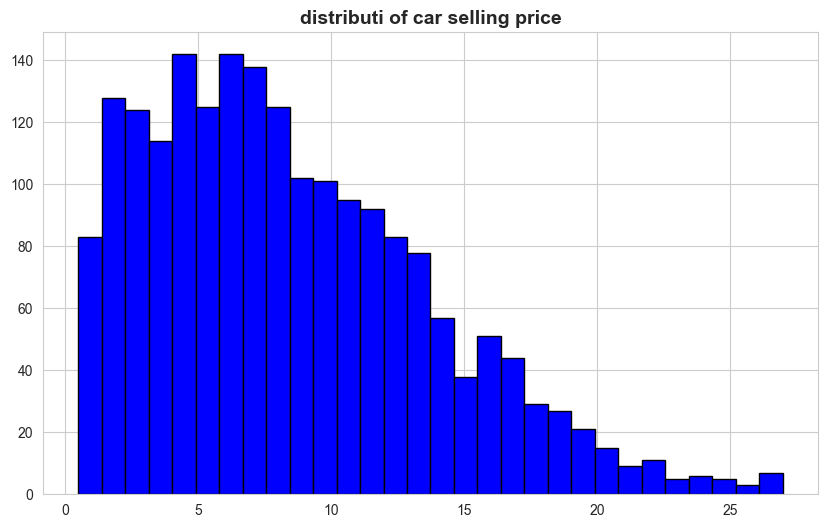

In [43]:
plt.figure (figsize=(10,6))
plt.hist(car_price_dataset["Selling_Price"],bins=30,color="blue",edgecolor="black")
plt.title("distributi of car selling price",fontsize=14,fontweight="bold")

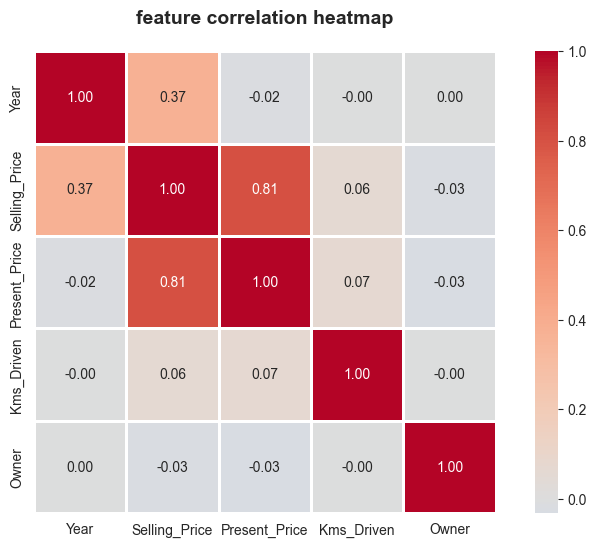

In [44]:
plt.figure(figsize=(10,6))
numeric_data=car_price_dataset.select_dtypes(include=[np.number])
correlation=numeric_data.corr()
sns.heatmap(correlation,annot=True,cmap="coolwarm",center=0,square=True,linewidths=1,fmt=".2f")
plt.title("feature correlation heatmap",fontsize=14,fontweight="bold",pad=20)
plt.show()

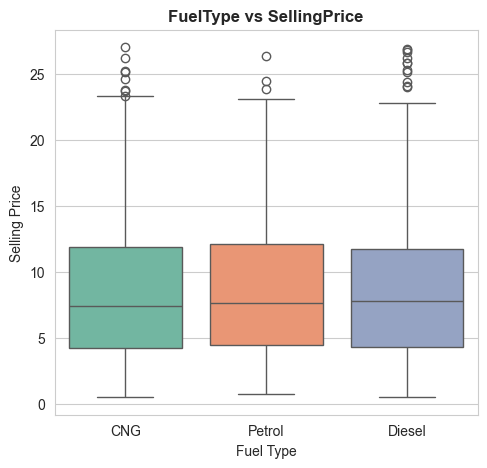

In [45]:
# fuel type vs selling type
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x="Fuel_Type",y="Selling_Price",data=car_price_dataset,palette="Set2")
plt.title("FuelType vs SellingPrice",fontweight="bold")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.show()

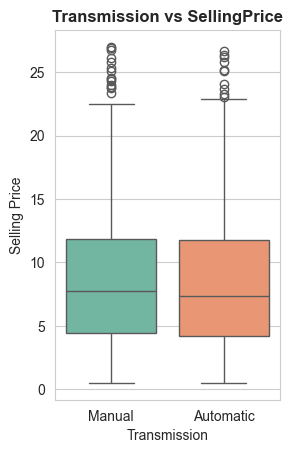

In [46]:
# transmission vs selling type
plt.subplot(1,2,2)
sns.boxplot(x="Transmission",y="Selling_Price",data=car_price_dataset,palette="Set2")
plt.title("Transmission vs SellingPrice",fontweight="bold")
plt.xlabel("Transmission")
plt.ylabel("Selling Price")
plt.show()

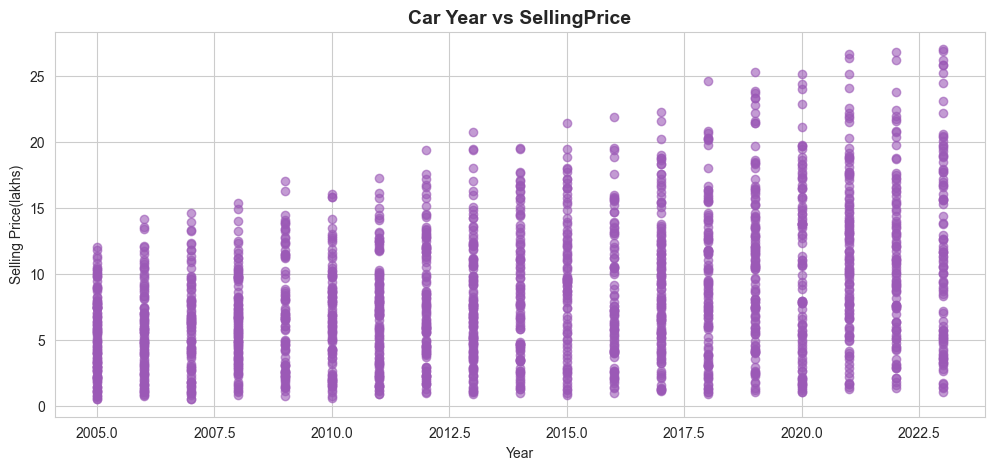

In [47]:
#year vs selling price
plt.figure(figsize=(12,5))
plt.scatter(car_price_dataset["Year"],car_price_dataset["Selling_Price"],alpha=0.6,c="#9b59b6")
plt.title("Car Year vs SellingPrice",fontsize=14,fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Selling Price(lakhs)")
plt.show()

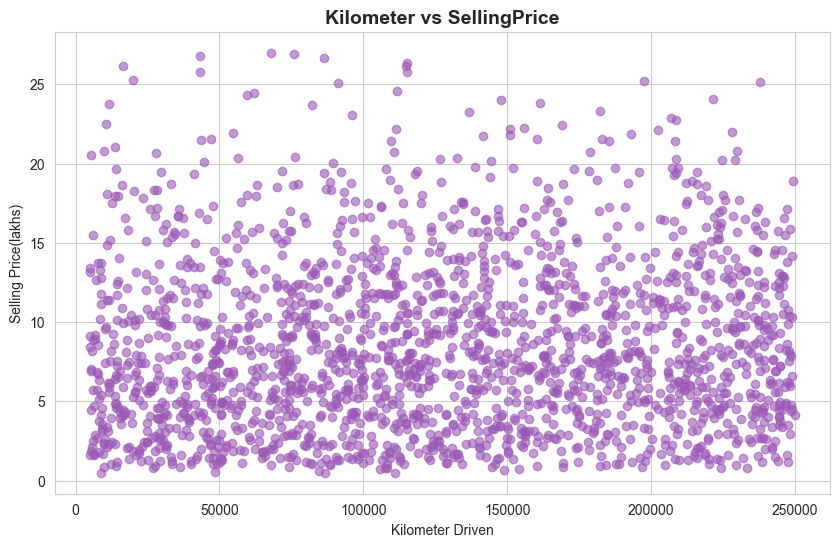

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(car_price_dataset["Kms_Driven"],car_price_dataset["Selling_Price"],alpha=0.6,c="#9b59b6")
plt.title("Kilometer vs SellingPrice",fontsize=14,fontweight="bold")
plt.xlabel("Kilometer Driven")
plt.ylabel("Selling Price(lakhs)")
plt.show()

In [49]:
# Encoding
car_price_dataset.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)

car_price_dataset.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)

car_price_dataset.replace({"Transmission": {"Manual":0,"Automatic":1}},inplace=True)

print("Encoded Dataset")
car_price_dataset.head()


Encoded Dataset


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Honda City,2011,8.25,28.29,108694,2,1,0,0
1,Toyota Fortuner,2015,9.53,17.16,131324,2,1,0,1
2,Maruti Baleno,2010,0.78,2.03,108355,0,0,1,1
3,Toyota Fortuner,2021,10.25,19.32,89478,1,1,1,3
4,Honda City,2019,8.06,22.41,72435,2,1,1,0


In [50]:
x=car_price_dataset.drop(["Car_Name","Selling_Price"],axis=1)

In [51]:
y=car_price_dataset["Selling_Price"]
print(x.head())

   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0  2011          28.29      108694          2            1             0   
1  2015          17.16      131324          2            1             0   
2  2010           2.03      108355          0            0             1   
3  2021          19.32       89478          1            1             1   
4  2019          22.41       72435          2            1             1   

   Owner  
0      0  
1      1  
2      1  
3      3  
4      0  


In [52]:
print(y.head())

0     8.25
1     9.53
2     0.78
3    10.25
4     8.06
Name: Selling_Price, dtype: float64


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(f" traning sample:{x_train.shape[0]}(80%)")

 traning sample:1600(80%)


In [54]:
print(f"testing sample:{x_test.shape[0]}(20%)")

testing sample:400(20%)


In [55]:
# Model linear regression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

train_pred_lr =lin_reg.predict(x_train)
train_r2_lr = metrics.r2_score(y_train,train_pred_lr)
train_mae_lr = metrics.mean_absolute_error(y_train,train_pred_lr)
train_rmse_lr =np.sqrt(metrics.mean_squared_error(y_train,train_pred_lr))

print("r2 score",train_r2_lr)
print("mae",train_mae_lr)
print("rmse",train_rmse_lr)

r2 score 0.7987851932585007
mae 1.8870197957347807
rmse 2.4049536587837728


In [56]:
lin_reg=LinearRegression()
lin_reg.fit(x_test,y_test)

test_pred_lr =lin_reg.predict(x_test)
test_r2_lr = metrics.r2_score(y_test,test_pred_lr)
test_mae_lr = metrics.mean_absolute_error(y_test,test_pred_lr)
test_rmse_lr =np.sqrt(metrics.mean_squared_error(y_test,test_pred_lr))

print("r2 score",test_r2_lr)
print("mae",test_mae_lr)
print("rmse",test_rmse_lr)

r2 score 0.776246467454619
mae 1.8816962009311635
rmse 2.3816774984633207


Text(0.5, 1.0, 'LinearRegression_testing')

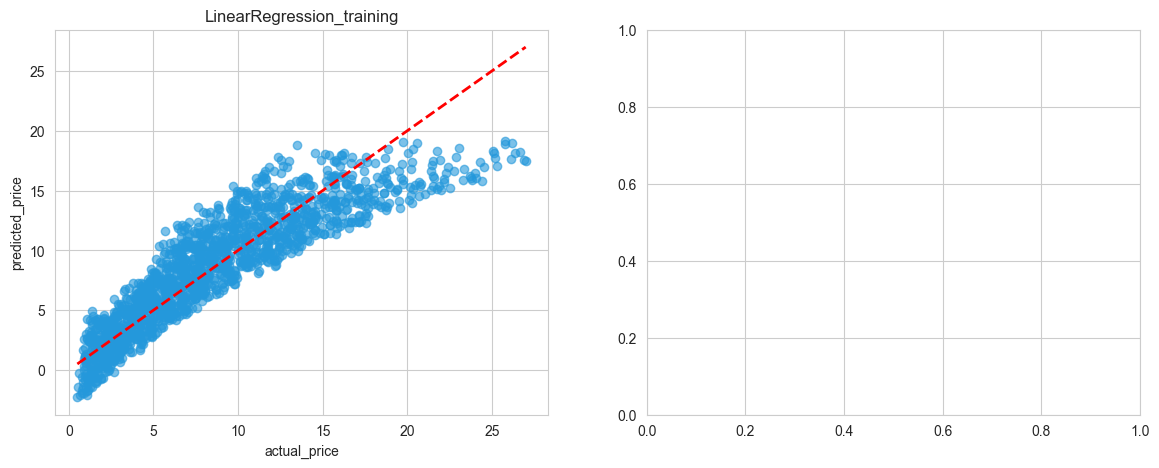

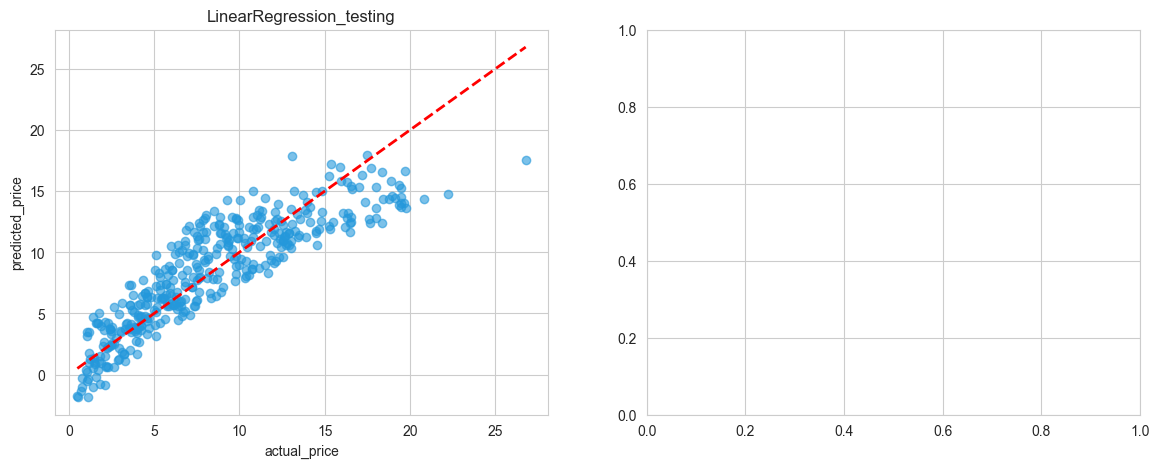

In [57]:
#train
fig, axes=plt.subplots(1,2,figsize=(14,5))
axes[0].scatter(y_train,train_pred_lr,alpha=0.6,color="#2498db")
axes[0].plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], "r--",lw=2)

axes[0].set_xlabel("actual price")
axes[0].set_ylabel("predicted price")
axes[0].set_title("LinearRegression-training")


#test
axes[1].scatter(y_test,test_pred_lr,alpha=0.6,color="#2498db")
axes[1].plot([y_test.min(), y_test.max()],[y_train.min(), y_train.max()],"r--",lw=2)

axes[1].set_xlabel("actual price")
axes[1].set_ylabel("predicted price")
axes[1].set_title("LinearRegression-testing")

In [58]:
#model 2 lesso regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train,y_train)

train_pred_lasso =lasso_reg.predict(x_train)
train_r2_lasso = metrics.r2_score(y_train,train_pred_lasso)
train_mae_lasso = metrics.mean_absolute_error(y_train,train_pred_lasso)
train_rmse_lasso =np.sqrt(metrics.mean_squared_error(y_train,train_pred_lasso))

print("r2 score",train_r2_lasso)
print("mae",train_mae_lasso)
print("rmse",train_rmse_lasso)


r2 score 0.7983281395386969
mae 1.8877271382009229
rmse 2.4076835014454043


In [59]:
#test
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_test,y_test)

test_pred_lasso =lasso_reg.predict(x_test)
test_r2_lasso = metrics.r2_score(y_test,test_pred_lasso)
test_mae_lasso = metrics.mean_absolute_error(y_test,test_pred_lasso)
test_rmse_lasso =np.sqrt(metrics.mean_squared_error(y_test,test_pred_lasso))

print("r2 score",test_r2_lasso)
print("mae",test_mae_lasso)
print("rmse",test_rmse_lasso)

r2 score 0.7756758619342472
mae 1.885069657417943
rmse 2.384712384667852


Text(0.5, 1.0, 'Lasso Regression_testing')

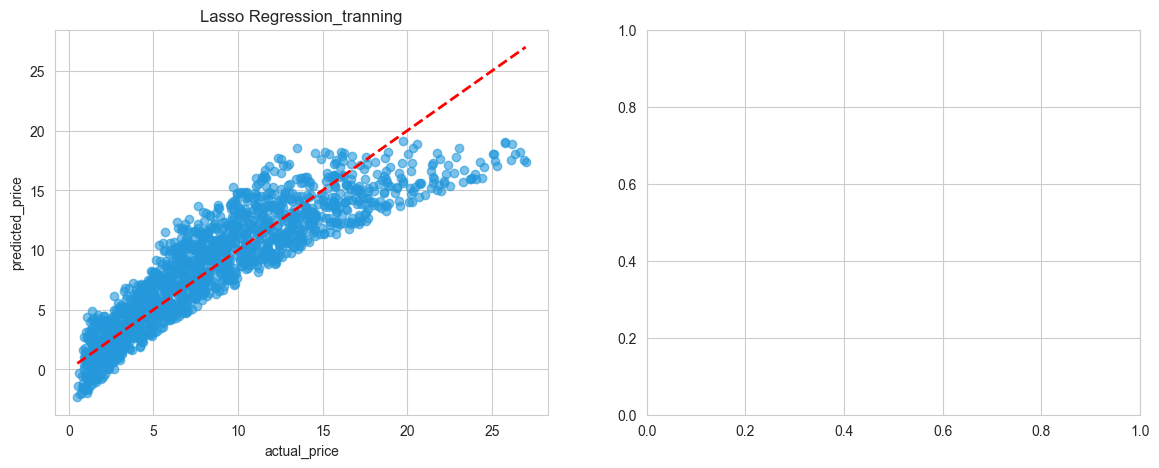

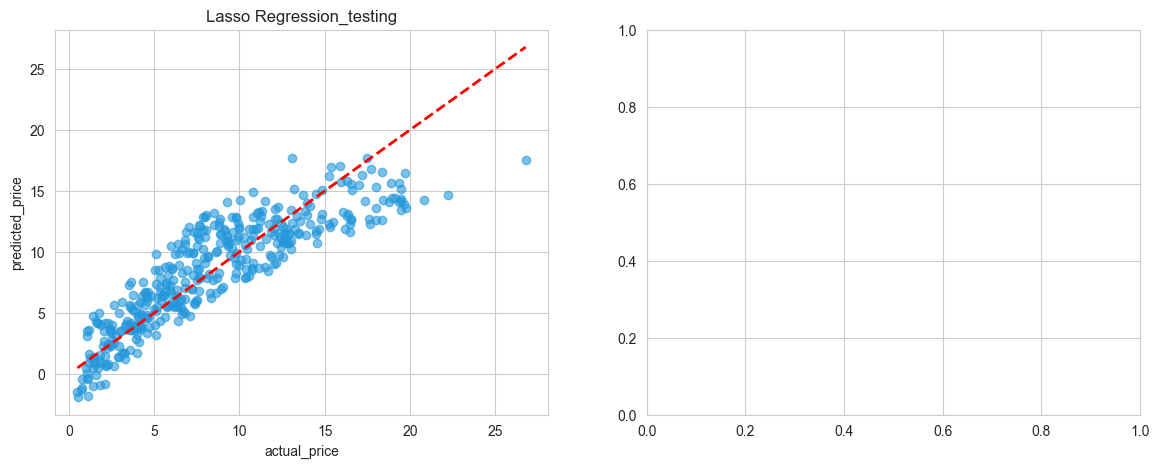

In [60]:
#train
fig, axes=plt.subplots(1,2,figsize=(14,5))
axes[0].scatter(y_train,train_pred_lasso,alpha=0.6,color="#2498db")
axes[0].plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], "r--",lw=2)

axes[0].set_xlabel("actual price")
axes[0].set_ylabel("predicted price")
axes[0].set_title("Lasso Regression-tranning")


#test
axes[1].scatter(y_test,test_pred_lasso,alpha=0.6,color="#2498db")
axes[1].plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],"r--",lw=2)

axes[1].set_xlabel("actual price")
axes[1].set_ylabel("predicted price")
axes[1].set_title("Lasso Regression-testing")

In [61]:
#model 3 random forest
rf_reg =RandomForestRegressor(n_estimators=100,random_state=2)
rf_reg.fit(x_train,y_train)

train_pred_rf =rf_reg.predict(x_train)
train_r2_rf = metrics.r2_score(y_train,train_pred_rf)
train_mae_rf = metrics.mean_absolute_error(y_train,train_pred_rf)
train_rmse_rf =np.sqrt(metrics.mean_squared_error(y_train,train_pred_rf))

print("r2 score",train_r2_rf)
print("mae",train_mae_rf)
print("rmse",train_rmse_rf)


r2 score 0.9723505516233258
mae 0.6518076249999999
rmse 0.8914971929358495


In [62]:
rf_reg =RandomForestRegressor(n_estimators=100,random_state=2)
rf_reg.fit(x_test,y_test)


test_pred_rf =rf_reg.predict(x_test)
test_r2_rf= metrics.r2_score(y_test,test_pred_rf)
test_mae_rf = metrics.mean_absolute_error(y_test,test_pred_rf)
test_rmse_rf =np.sqrt(metrics.mean_squared_error(y_test,test_pred_rf))

print("r2 score",test_r2_rf)
print("mae",train_mae_rf)
print("rmse",train_rmse_rf)

r2 score 0.97344450195401
mae 0.6518076249999999
rmse 0.8914971929358495


In [63]:
feature_importance=pd.DataFrame({
    "feature":x.columns,
    "importance":rf_reg.feature_importances_
}).sort_values("importance",ascending=False)
print(feature_importance)

         feature  importance
1  Present_Price    0.741678
0           Year    0.175526
2     Kms_Driven    0.043763
6          Owner    0.015132
5   Transmission    0.008638
3      Fuel_Type    0.008305
4    Seller_Type    0.006957


Text(0.5, 1.0, 'RandomForestRegressor_testing')

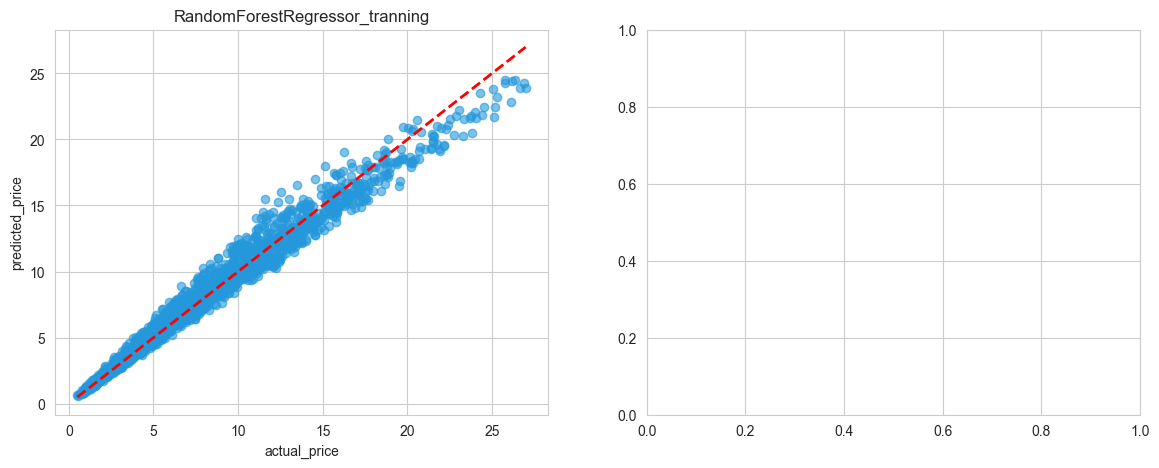

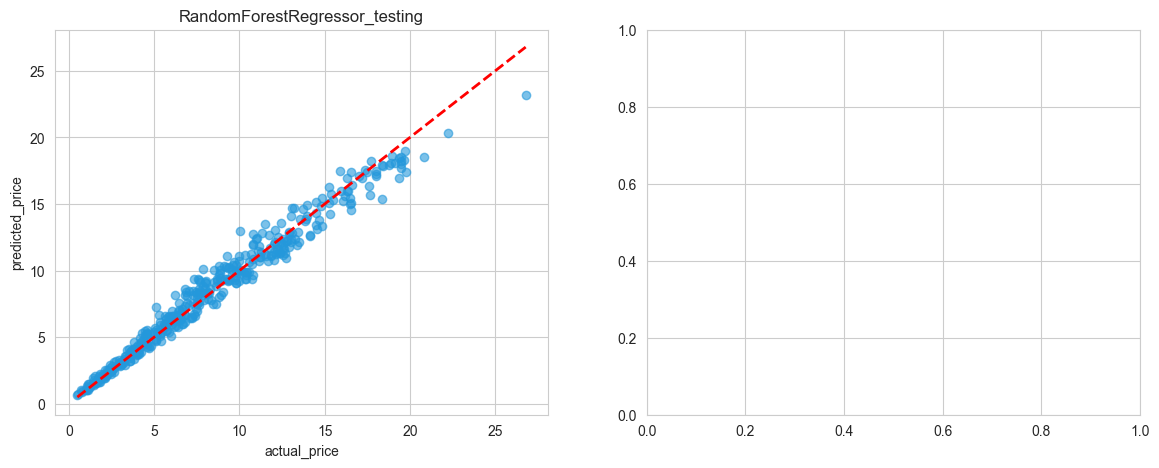

In [64]:
#train
fig, axes=plt.subplots(1,2,figsize=(14,5))
axes[0].scatter(y_train,train_pred_rf,alpha=0.6,color="#2498db")
axes[0].plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], "r--",lw=2)

axes[0].set_xlabel("actual price")
axes[0].set_ylabel("predicted price")
axes[0].set_title("RandomForestRegressor-tranning")


#test
axes[1].scatter(y_test,test_pred_rf,alpha=0.6,color="#2498db")
axes[1].plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],"r--",lw=2)

axes[1].set_xlabel("actual price")
axes[1].set_ylabel("predicted price")
axes[1].set_title("RandomForestRegressor-testing")

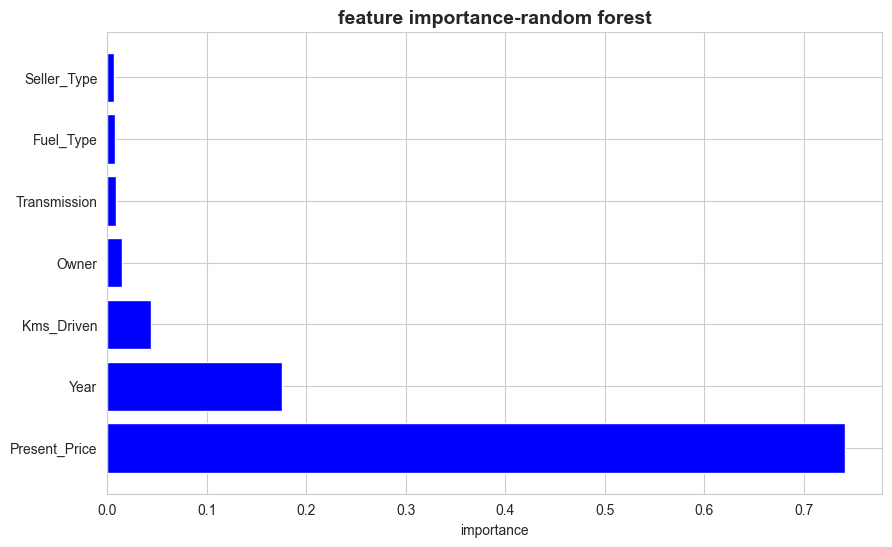

In [65]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance["feature"],feature_importance["importance"],color="blue")
plt.xlabel("importance")
plt.title("feature importance-random forest",fontsize=14,fontweight="bold")
plt.show()

In [66]:
#model comparission
print("LinearRegression",test_r2_lr)
print("lasso_reg",test_r2_lasso)
print("RandomForestRegressor",test_r2_rf)

LinearRegression 0.776246467454619
lasso_reg 0.7756758619342472
RandomForestRegressor 0.97344450195401


In [67]:
#some best model
joblib.dump(rf_reg,"car_prediction_model.pkl")

['car_prediction_model.pkl']

In [68]:
input_data=pd.DataFrame({
    "Year":[2016],
    "Present_Price":[19.46],
    "Kms_Driven":[24085],
    "Fuel_Type":[0],
    "Seller_Type":[1],
    "Transmission":[0],
    "Owner":[1]
    })

prediction=rf_reg.predict(input_data)[0]
print(prediction)

11.635699999999995
